<a href="https://colab.research.google.com/github/Arjun-RY/tropical_cyclone_classification/blob/main/tropical__cyclones_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Package import and installation

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, f1_score

#Data Cleaning

In [ ]:
df=pd.read_csv('named_storm_data_since_1950.csv')
print(df.shape)
df.head()

(808, 8)


,year,storm_name,start_date,end_date,dates,max_wind_speed_mph,min_pressure_mb,storm_type
0,1950,ABLE,1950-08-12,1950-08-24,8/12 - 8/24,110,953.0,Hurricane
1,1950,BAKER,1950-08-18,1950-09-01,8/18 - 9/1,90,979.0,Hurricane
2,1950,CHARLIE,1950-08-21,1950-09-05,8/21 - 9/5,95,974.0,Hurricane
3,1950,EASY,1950-09-01,1950-09-09,9/1 - 9/9,105,960.0,Hurricane
4,1950,FOX,1950-09-08,1950-09-17,9/8 - 9/17,120,946.0,Hurricane


In [ ]:
df.nunique()

year                   72
storm_name            313
start_date            781
end_date              784
dates                 662
max_wind_speed_mph     28
min_pressure_mb       107
storm_type              7
dtype: int64

In [ ]:
del df['dates'],df['storm_name']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                808 non-null    int64  
 1   start_date          808 non-null    object 
 2   end_date            808 non-null    object 
 3   max_wind_speed_mph  808 non-null    int64  
 4   min_pressure_mb     797 non-null    float64
 5   storm_type          808 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 38.0+ KB


In [ ]:
df['start_date'] = pd.to_datetime(df.start_date)
df['end_date'] = pd.to_datetime(df.end_date)

In [ ]:
df.dtypes

year                           int64
storm_name                    object
start_date            datetime64[ns]
end_date              datetime64[ns]
dates                         object
max_wind_speed_mph             int64
min_pressure_mb              float64
storm_type                    object
dtype: object

In [ ]:
df['No_of_days'] = (df['end_date'] - df['start_date']).dt.days
df.head()

,year,storm_name,start_date,end_date,dates,max_wind_speed_mph,min_pressure_mb,storm_type,No_of_days
0,1950,ABLE,1950-08-12,1950-08-24,8/12 - 8/24,110,953.0,Hurricane,12
1,1950,BAKER,1950-08-18,1950-09-01,8/18 - 9/1,90,979.0,Hurricane,14
2,1950,CHARLIE,1950-08-21,1950-09-05,8/21 - 9/5,95,974.0,Hurricane,15
3,1950,EASY,1950-09-01,1950-09-09,9/1 - 9/9,105,960.0,Hurricane,8
4,1950,FOX,1950-09-08,1950-09-17,9/8 - 9/17,120,946.0,Hurricane,9


In [ ]:
df['storm_type'].unique()

array(['Hurricane', 'Tropical Storm', 'Tropical Depression',
       'Subtropical Storm', 'Extratropical', 'Tropical Low',
       'Potential Tropical Cyclone'], dtype=object)

In [ ]:
df['storm_type'].value_counts()

Hurricane                     451
Tropical Storm                343
Extratropical                   5
Tropical Depression             3
Subtropical Storm               3
Tropical Low                    2
Potential Tropical Cyclone      1
Name: storm_type, dtype: int64

In [ ]:
count=0
for i in range(808):
  y=df['storm_type'][i]
  if y.lower().find('tropical')>=0:
    df.at[i,'storm_type']='Storm'
    count+=1

print(count)

357


In [ ]:
df['storm_type'].value_counts()

Hurricane    451
Storm        357
Name: storm_type, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                808 non-null    int64         
 1   storm_name          808 non-null    object        
 2   start_date          808 non-null    datetime64[ns]
 3   end_date            808 non-null    datetime64[ns]
 4   dates               808 non-null    object        
 5   max_wind_speed_mph  808 non-null    int64         
 6   min_pressure_mb     797 non-null    float64       
 7   storm_type          808 non-null    object        
 8   No_of_days          808 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 56.9+ KB


In [ ]:
df=df.dropna()

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(797, 9)

In [ ]:
le = LabelEncoder()
df.storm_type = le.fit_transform(df.storm_type)
df.head()

,year,storm_name,start_date,end_date,dates,max_wind_speed_mph,min_pressure_mb,storm_type,No_of_days
0,1950,ABLE,1950-08-12,1950-08-24,8/12 - 8/24,110,953.0,0,12
1,1950,BAKER,1950-08-18,1950-09-01,8/18 - 9/1,90,979.0,0,14
2,1950,CHARLIE,1950-08-21,1950-09-05,8/21 - 9/5,95,974.0,0,15
3,1950,EASY,1950-09-01,1950-09-09,9/1 - 9/9,105,960.0,0,8
4,1950,FOX,1950-09-08,1950-09-17,9/8 - 9/17,120,946.0,0,9


# EDA

In [ ]:
df.corr()

,year,max_wind_speed_mph,min_pressure_mb,storm_type,No_of_days
year,1.000000,-0.153120,0.103054,0.186064,-0.110133
max_wind_speed_mph,-0.153120,1.000000,-0.935201,-0.770932,0.602411
min_pressure_mb,0.103054,-0.935201,1.000000,0.668801,-0.610017
storm_type,0.186064,-0.770932,0.668801,1.000000,-0.510990
No_of_days,-0.110133,0.602411,-0.610017,-0.510990,1.000000


In [ ]:
df.describe()

,year,max_wind_speed_mph,min_pressure_mb,storm_type,No_of_days
count,797.000000,797.000000,797.000000,797.000000,797.000000
mean,1992.668758,74.962359,979.208281,0.439147,7.728984
std,21.304639,29.670487,24.640109,0.496595,4.604927
min,1950.000000,30.000000,882.000000,0.000000,0.000000
25%,1976.000000,50.000000,965.000000,0.000000,4.000000
50%,1997.000000,70.000000,986.000000,0.000000,7.000000
75%,2011.000000,95.000000,999.000000,1.000000,10.000000
max,2022.000000,165.000000,1013.000000,1.000000,29.000000


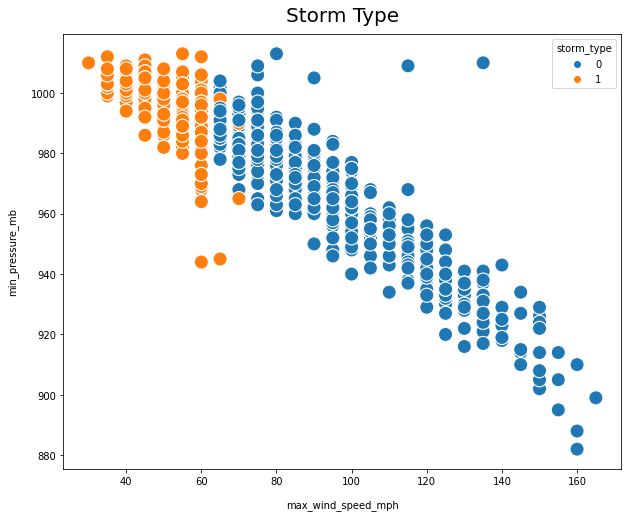

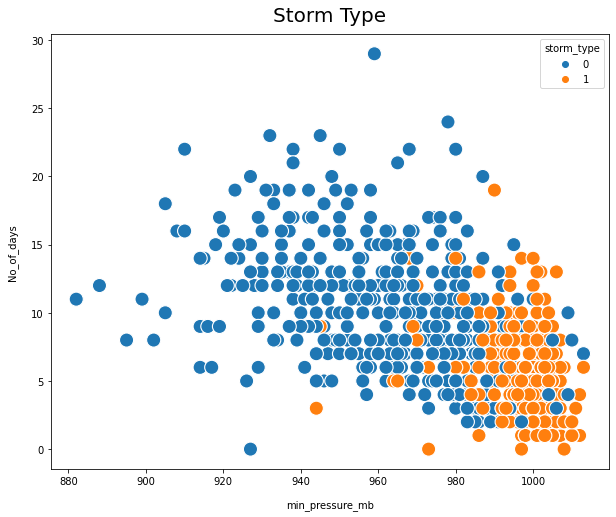

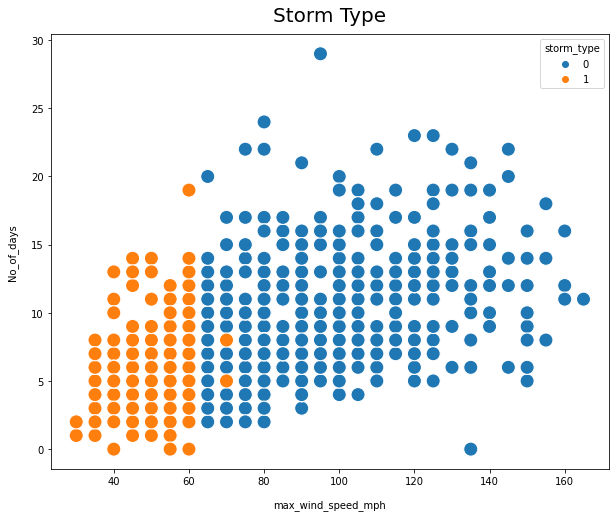

In [ ]:
def gcaplot(a,b):
  plt.figure(figsize=(10, 8))
  sn.scatterplot(x=a, y=b, hue='storm_type', data=df, s=200)
  plt.title("Storm Type", y=1.015, fontsize=20)
  plt.xlabel(a, labelpad=13)
  plt.ylabel(b, labelpad=13)
  ax = plt.gca()

gcaplot('max_wind_speed_mph','min_pressure_mb')
gcaplot('min_pressure_mb','No_of_days')
gcaplot('max_wind_speed_mph','No_of_days')

#Modelling

In [ ]:
features=['max_wind_speed_mph','min_pressure_mb','No_of_days']
X = df[features]
y = df['storm_type'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

[[-1.56120247 -0.08733464 -0.01415641]]
Confusion Matrix :  [[116   0]
 [  2  82]]
F1 score :  0.9879518072289156
Accuracy :  0.99
ROC-AUC score :  0.9880952380952381


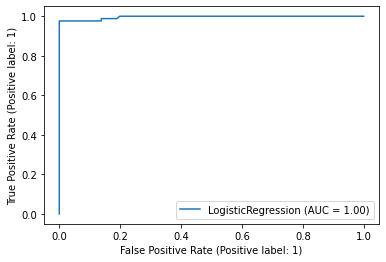

In [ ]:
lr= LogisticRegression()
logistic_regression=lr.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print(logistic_regression.coef_)
print('Confusion Matrix : ',confusion_matrix(y_test,y_pred))
print('F1 score : ',f1_score(y_test,y_pred))
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('ROC-AUC score : ',roc_auc_score(y_test,y_pred))
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.show()

In [ ]:
model=LogisticRegression(random_state=5)
features=pd.get_dummies(df[['max_wind_speed_mph','min_pressure_mb','No_of_days']],drop_first=True)
model.fit(features,df['storm_type'])
feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[abs(i) for i in model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)

,feature,feature_importance
0,max_wind_speed_mph,0.934641
1,min_pressure_mb,0.059491
2,No_of_days,0.028402


###From the FEATURE IMPORTANCE table , we conclude that max_wind_speed_mph is the most important feature to classify the type of storm. Hence, a new model is performed only using 'max_wind_speed_mph' as feature.

In [ ]:
X = df[['max_wind_speed_mph']].values
y = df['storm_type'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

Confusion Matrix : 
 [[116   0]
 [  2  82]]
F1 score :  0.9879518072289156
Accuracy :  0.99
ROC-AUC score :  0.9880952380952381


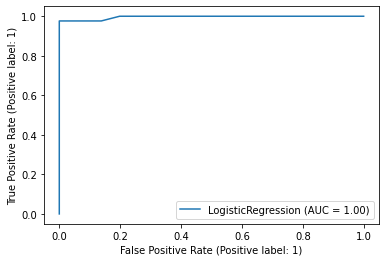

In [ ]:
lr1= LogisticRegression()
logistic_regression=lr1.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))
print('F1 score : ',f1_score(y_test,y_pred))
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('ROC-AUC score : ',roc_auc_score(y_test,y_pred))
RocCurveDisplay.from_estimator(lr1, X_test, y_test)
plt.show()

# Inference
From the AUC-ROC graph, we can infer that max_wind_speed_mph (feature) alone is needed to classify the tropical cyclone type